In [10]:
# Import dependencies and setup

import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as maplotlib
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(15,5)

In [11]:
# Load and preview dataset

raw_df = pd.read_csv('../Resources/coal_generation.csv', index_col='Year', parse_dates=True)
raw_df

FileNotFoundError: [Errno 2] No such file or directory: '../Resources/coal_generation.csv'

In [ ]:
# Prepare for Prophet
# Reset index

df = raw_df.reset_index()
df.head()

In [ ]:
# Rename 'Year' and 'Coal' to 'ds' and 'y', respectively

df = df.rename(columns={'Year':'ds', 'Coal':'y'})
df.head()

In [ ]:
# Set index and preview plot

df.set_index('ds').y.plot()

In [ ]:
# Determine if a trend exist via log-transform

df['y'] = np.log(df['y'])
df.tail()

In [ ]:
# Set 'ds' as index

df.set_index('ds').y.plot()

In [8]:
# Create model

model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df);

NameError: name 'df' is not defined

In [9]:
# Add future dates to model (5 years / 60 months)

future = model.make_future_dataframe(periods=10, freq = 'y')
future.tail()

Exception: Model has not been fit.

In [5]:
# Forecast and run through Prophet model

forecast = model.predict(future)
forecast.tail()

NameError: name 'model' is not defined

In [6]:
# Drop surplus columns

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

NameError: name 'forecast' is not defined

In [1]:
# Plot forecast

model.plot(forecast);

# Plot
fig, ax1 = plt.subplots()
ax1.plot(model.plot(forecast), color='black', linestyle=':')

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
ax1.set_title('Coal generation in petajoules (Blue) vs. Forecast (Grey), 1974–2028', fontdict = font_1)
ax1.set_ylabel('Price (USD/Barrel)', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
#plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/final-project/Images/coal_generation_forecast.png", 
           #transparent=False, dpi=300)
plt.show()

NameError: name 'model' is not defined

In [17]:
# Finalise visualisation
# Set 'ds' as index for both dataframes

df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [18]:
# Combine both dataframes

vis_df = raw_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df.head()

,Coal,yhat,yhat_lower,yhat_upper
1974-01-01,981.1,6.875583,6.845640,6.904736
1975-01-01,981.2,6.911602,6.882813,6.940024
1976-01-01,1047.7,6.964561,6.934018,6.993606
1977-01-01,1070.4,6.961097,6.933133,6.992993
1978-01-01,1103.0,7.000052,6.971171,7.028955


In [19]:
# Rescale columns to get same scale

vis_df['yhat_rescaled'] = np.exp(vis_df['yhat'])
vis_df.head()

,Coal,yhat,yhat_lower,yhat_upper,yhat_rescaled
1974-01-01,981.1,6.875583,6.845640,6.904736,968.339865
1975-01-01,981.2,6.911602,6.882813,6.940024,1003.853715
1976-01-01,1047.7,6.964561,6.934018,6.993606,1058.450086
1977-01-01,1070.4,6.961097,6.933133,6.992993,1054.790150
1978-01-01,1103.0,7.000052,6.971171,7.028955,1096.690475


<AxesSubplot:>

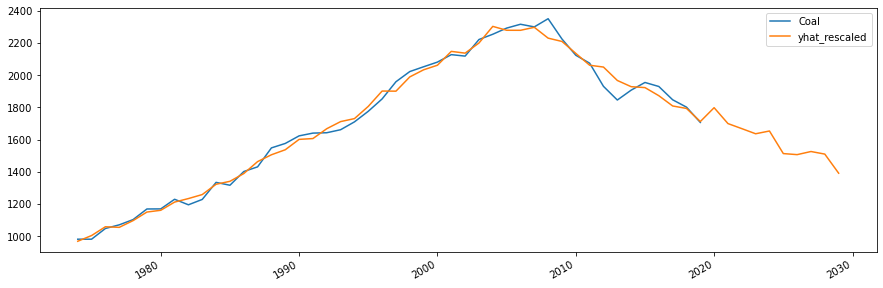

In [20]:
# Plot 'Coal' and 'yhat_rescaled'

vis_df[['Coal', 'yhat_rescaled']].plot()

In [21]:
# Ensure crude_oil and model data are connected

raw_df.index = pd.to_datetime(raw_df.index) #make sure our index as a datetime object
connect_date = raw_df.index[-2] #select the 2nd to last date

In [22]:
# Mask forecast data

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [23]:
# Preview prediction

predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.866488,7.415354,7.476022,0.866488,0.866488,6.579008,6.579008,6.579008,4.770405,4.770405,...,-0.010535,-0.010535,-0.010535,1.819139,1.819139,1.819139,0.0,0.0,0.0,7.445497
2019-12-31,0.843129,7.468025,7.522670,0.842200,0.843887,6.651444,6.651444,6.651444,4.770405,4.770405,...,-0.010535,-0.010535,-0.010535,1.891575,1.891575,1.891575,0.0,0.0,0.0,7.494573
2020-12-31,0.819641,7.407675,7.466887,0.815655,0.823608,6.618433,6.618433,6.618433,4.770405,4.770405,...,0.011863,0.011863,0.011863,1.836165,1.836165,1.836165,0.0,0.0,0.0,7.438073
2021-12-31,0.796217,7.391840,7.451001,0.788009,0.804576,6.623238,6.623238,6.623238,4.770405,4.770405,...,0.002231,0.002231,0.002231,1.850602,1.850602,1.850602,0.0,0.0,0.0,7.419454
2022-12-31,0.772793,7.367495,7.432202,0.759591,0.786185,6.627342,6.627342,6.627342,4.770405,4.770405,...,-0.012120,-0.012120,-0.012120,1.869058,1.869058,1.869058,0.0,0.0,0.0,7.400135


In [24]:
# Create updated dataframe

vis_df = raw_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df['yhat_scaled']=np.exp(vis_df['yhat'])

In [25]:
# Preview head

vis_df.head()

,Coal,yhat,yhat_lower,yhat_upper,yhat_scaled
1974-01-01,981.1,NaN,NaN,NaN,NaN
1975-01-01,981.2,NaN,NaN,NaN,NaN
1976-01-01,1047.7,NaN,NaN,NaN,NaN
1977-01-01,1070.4,NaN,NaN,NaN,NaN
1978-01-01,1103.0,NaN,NaN,NaN,NaN


In [27]:
# Save dataframe as .csv

csv = vis_df.to_csv('coal_forecasted.csv', index=True)

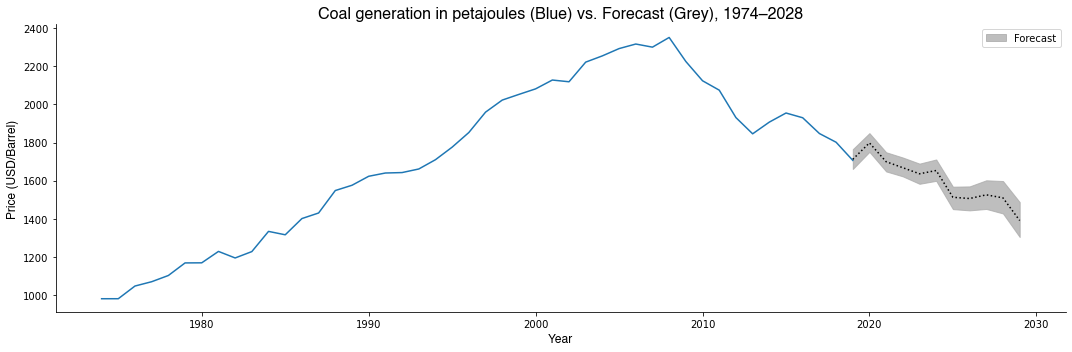

In [26]:
# Plot final visualisation

# Plot
fig, ax1 = plt.subplots()
ax1.plot(vis_df.Coal)
ax1.plot(vis_df.yhat_scaled, color='black', linestyle=':')

# Fill
ax1.fill_between(vis_df.index, np.exp(vis_df['yhat_upper']), np.exp(vis_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
ax1.set_title('Coal generation in petajoules (Blue) vs. Forecast (Grey), 1974–2028', fontdict = font_1)
ax1.set_ylabel('Price (USD/Barrel)', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/final-project/Images/coal_generation_forecast.png", 
           transparent=False, dpi=300)
plt.show()

In [28]:
# Save model
import json
from prophet.serialize import model_to_json, model_from_json

# Save
with open('./coal_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)